<a href="https://colab.research.google.com/github/Nikhileswar-Komati/Machine_Learning/blob/master/Matplot_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
! unzip '/content/Data_Visualization_with_Matplotlib.zip'

Archive:  /content/Data_Visualization_with_Matplotlib.zip
  inflating: Visualization with Matplotlib_v2.ipynb  
  inflating: bigmart_data.csv        


In [4]:
df = pd.read_csv('/content/bigmart_data.csv')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
type_vs_mrp = df.groupby('Item_Type').Item_MRP.mean()[:5]
type_vs_mrp

Item_Type
Baking Goods    126.380766
Breads          140.952669
Breakfast       141.788151
Canned          139.763832
Dairy           148.499208
Name: Item_MRP, dtype: float64

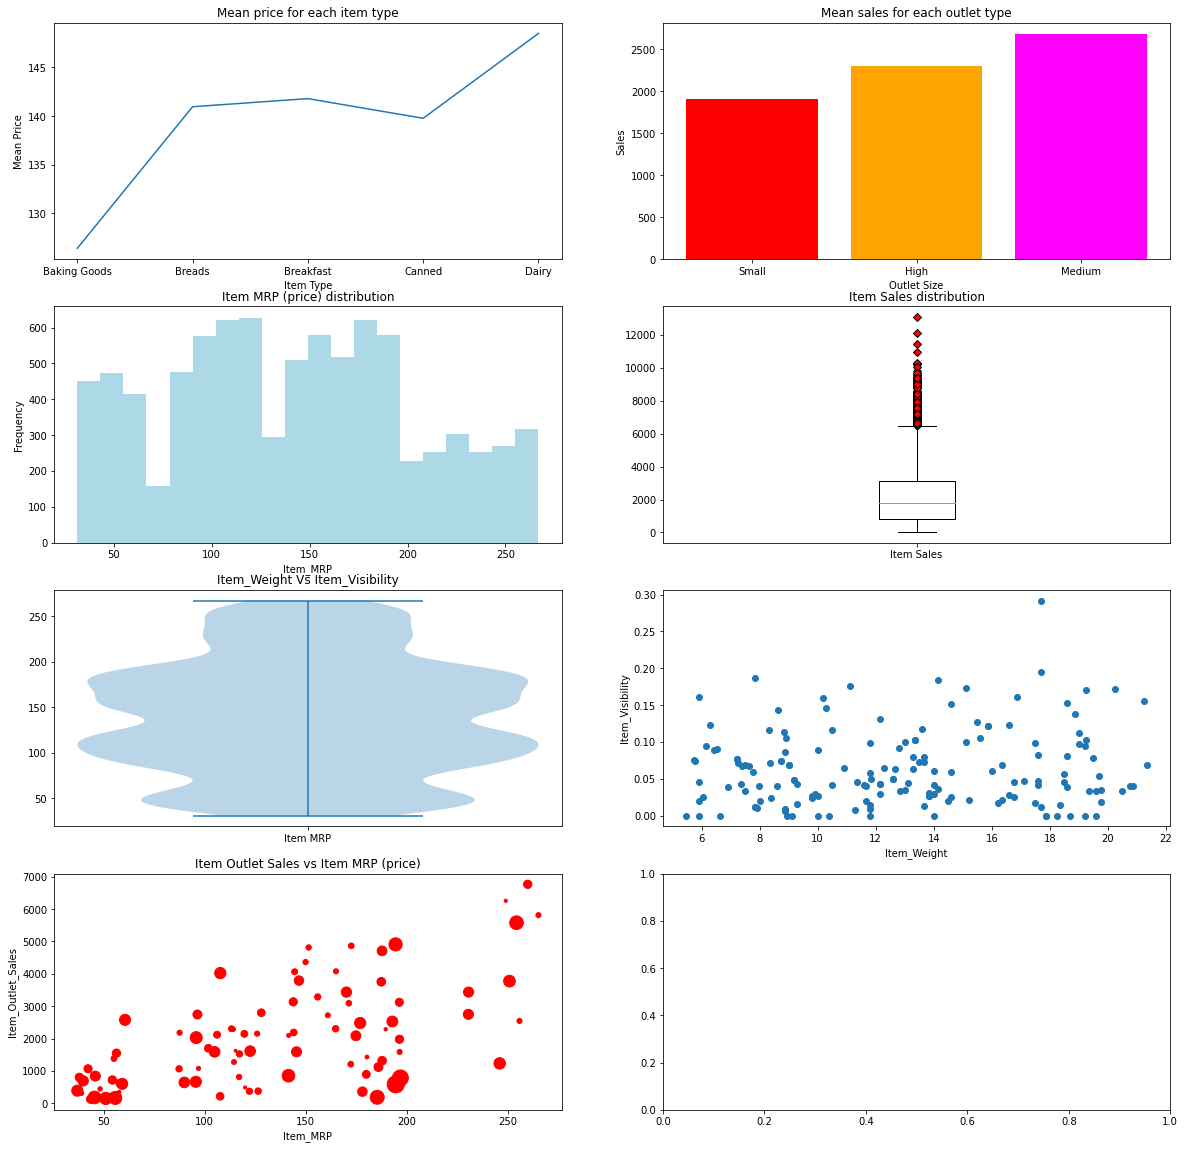

In [43]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (20,20))
x = type_vs_mrp.index.tolist()
y = type_vs_mrp.values.tolist()
ax[0][0].set_title('Mean price for each item type')

# set axis labels
ax[0][0].set_xlabel('Item Type')
ax[0][0].set_ylabel('Mean Price')

# set xticks 
ax[0][0].set_xticklabels(labels = x)
ax[0][0].set_xticks(ticks = np.arange(len(x)))
ax[0][0].plot(x, y)

sales_by_outlet_size = df.groupby('Outlet_Size').Item_Outlet_Sales.mean()

# sort by sales
sales_by_outlet_size.sort_values(inplace=True)

x = sales_by_outlet_size.index.tolist()
y = sales_by_outlet_size.values.tolist()

# set axis labels
ax[0][1].set_xlabel('Outlet Size')
ax[0][1].set_ylabel('Sales')

# set title
ax[0][1].set_title('Mean sales for each outlet type')

# set xticks 
ax[0][1].set_xticks(ticks=np.arange(len(x)))
ax[0][1].set_xticklabels(labels = x)
ax[0][1].bar(x, y, color=['red', 'orange', 'magenta'])

ax[1][0].set_title('Item MRP (price) distribution')

# xlabel
ax[1][0].set_xlabel('Item_MRP')

# ylabel
ax[1][0].set_ylabel('Frequency')

# plot histogram
ax[1][0].hist(df['Item_MRP'], bins=20, color='lightblue')

data = df['Item_Outlet_Sales']

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
ax[1][1].set_title('Item Sales distribution')

# make the boxplot
ax[1][1].boxplot(data.values, labels=['Item Sales'], flierprops=red_diamond);


data = df['Item_MRP']


# add labels to x axis
ax[2][0].set_xticks(ticks=[1])
ax[2][0].set_xticklabels(labels=['Item MRP'])

# make the violinplot
ax[2][0].violinplot(data.values);

ax[2][0].set_title('Item_Weight Vs Item_Visibility')
ax[2][1].set_xlabel('Item_Weight')
ax[2][1].set_ylabel('Item_Visibility')

# plot
ax[2][1].scatter(df["Item_Weight"][:200], df["Item_Visibility"][:200])

# set label of axes 
ax[3][0].set_xlabel('Item_MRP')
ax[3][0].set_ylabel('Item_Outlet_Sales')

# set title
ax[3][0].set_title('Item Outlet Sales vs Item MRP (price)')

# plot
ax[3][0].scatter(df["Item_MRP"][:100], df["Item_Outlet_Sales"][:100], s=df["Item_Visibility"][:100]*1000, c='red')